In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, invgamma, gamma
from scipy.linalg import sqrtm
from scipy.optimize import minimize
import pandas as pd
from tqdm import tqdm

# Оценки для опционов колл на отношение цен

Пример (Haug, 2007, с. 203). Вычислите оценки для опционов колл на отношение для
$\sigma_1=0.3$, $\sigma_2=0.4$, $b_1=0.05$,
$b_2=0.03$, $r=0.07$, $S_1=130$, $S_2=100$, $T=0.25, 0.5$, $\rho=\{-0.5, 0, 0.5\}$ и $K=0.1, 0.2, \ldots, 1.0, 2.0, 3.0$, безрисковая ставка 7\%.

In [22]:
sigma1 = 0.3
sigma2 = 0.4
b1 = 0.05
b2 = 0.03
r = 0.07
S1 = 130
S2 = 100
T_range = [0.25, 0.5]
rho_range = [-0.5, 0, 0.5]
K_range = list(np.arange(0.1, 3.1, 0.1))

In [18]:
# оценка стоимости опциона колл на отношение цен двух активов
def quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call):
    theta = 1
    if is_call == False:
        theta = -1
    sigma_hat = np.sqrt(sigma1 ** 2 + sigma2 ** 2 - 2 * rho * sigma1 * sigma2)

    d1 = (np.log(S1 / S2 / K) + (b1 - b2 - 0.5 * (sigma1 ** 2 - sigma2 ** 2)) * T) / \
         (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)
    F = S1 / S2 * np.exp((b1 - b2 +  sigma2 * (sigma2 - rho * sigma1)) * T)
    option = theta * np.exp(-r * T) * (F * norm.cdf(theta * d2) - K * norm.cdf(theta * d1))

    return option

In [19]:
outperformance_df = pd.DataFrame([
    {
        'K': K,
        'rho': rho,
        'T': T,
        'price':quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call = True)
    }
    for K in K_range
    for rho in rho_range
    for T in T_range
])

In [5]:
pd.pivot_table(outperformance_df, values='price', index=['K'], columns=['T', 'rho'])

T        0.25                              0.50                    
rho      -0.5       0.0           0.5      -0.5       0.0       0.5
K                                                                  
0.1  1.258176  1.237981  1.218087e+00  1.318772  1.276942  1.236349
0.2  1.159910  1.139716  1.119822e+00  1.222211  1.180382  1.139789
0.3  1.061645  1.041450  1.021556e+00  1.125658  1.083821  1.043228
0.4  0.963381  0.943185  9.232911e-01  1.029201  0.987271  0.946668
0.5  0.865142  0.844921  8.250259e-01  0.933227  0.890826  0.850109
0.6  0.767100  0.746686  7.267608e-01  0.838607  0.794886  0.753578
0.7  0.669880  0.648681  6.285021e-01  0.746640  0.700395  0.657273
0.8  0.574835  0.551674  5.303439e-01  0.658795  0.608852  0.561914
0.9  0.484000  0.457423  4.328959e-01  0.576419  0.522055  0.469130
1.0  0.399660  0.368638  3.382126e-01  0.500532  0.441702  0.381422
1.1  0.323794  0.288321  2.503546e-01  0.431749  0.369086  0.301586
1.2  0.257675  0.218872  1.743351e-01  0.370288  0.304936  0.231923
1.3  0.201735  0.161489  1.138825e-01  0.316041  0.249416  0.173677
1.4  0.155654  0.116063  6.986651e-02  0.268656  0.202224  0.126904
1.5  0.118577  0.081469  4.041277e-02  0.227624  0.162732  0.090696
1.6  0.089341  0.056007  2.215991e-02  0.192349  0.130120  0.063560
1.7  0.066683  0.037811  1.158871e-02  0.162202  0.103489  0.043788
1.8  0.049379  0.025132  5.814785e-03  0.136562  0.081946  0.029725
1.9  0.036324  0.016485  2.815324e-03  0.114840  0.064655  0.019926
2.0  0.026575  0.010692  1.322108e-03  0.096496  0.050866  0.013215
2.1  0.019356  0.006871  6.050017e-04  0.081041  0.039927  0.008687
2.2  0.014049  0.004381  2.708747e-04  0.068047  0.031287  0.005668
2.3  0.010168  0.002776  1.190836e-04  0.057135  0.024487  0.003676
2.4  0.007344  0.001750  5.156523e-05  0.047983  0.019148  0.002372
2.5  0.005296  0.001099  2.205238e-05  0.040310  0.014966  0.001525
2.6  0.003816  0.000688  9.336073e-06  0.033882  0.011695  0.000977
2.7  0.002747  0.000430  3.920709e-06  0.028496  0.009140  0.000625
2.8  0.001978  0.000268  1.636139e-06  0.023983  0.007145  0.000399
2.9  0.001424  0.000167  6.795067e-07  0.020201  0.005588  0.000254
3.0  0.001025  0.000104  2.812284e-07  0.017030  0.004374  0.000162

Пример. Повторите вычисления для опционов пут.

In [13]:
# оценка стоимости опциона колл на отношение цен двух активов
def quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call):
    theta = 1
    if is_call == False:
        theta = -1
    sigma_hat = np.sqrt(sigma1 ** 2 + sigma2 ** 2 - 2 * rho * sigma1 * sigma2)

    d1 = (np.log(S1 / S2 / K) + (b1 - b2 - 0.5 * (sigma1 ** 2 - sigma2 ** 2)) * T) / \
         (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)
    F = S1 / S2 * np.exp((b1 - b2 +  sigma2 * (sigma2 - rho * sigma1)) * T)
    option = theta * np.exp(-r * T) * (F * norm.cdf(theta * d2) - K * norm.cdf(theta * d1))

    return option

In [14]:
outperformance_df = pd.DataFrame([
    {
        'K': K,
        'rho': rho,
        'T': T,
        'price':quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call = False)
    }
    
    for K in K_range
    for rho in rho_range
    for T in T_range
])

pd.pivot_table(outperformance_df, values='price', index=['K'], columns=['T', 'rho'])

T            0.25                                      0.50                \
rho          -0.5           0.0           0.5          -0.5           0.0   
K                                                                           
0.1  3.778084e-20  6.901476e-28  1.250578e-49  5.123091e-12  4.854537e-16   
0.2  2.487462e-12  1.411677e-16  2.177139e-28  7.989515e-08  4.387780e-10   
0.3  9.205951e-09  1.827384e-11  6.814500e-19  7.344569e-06  2.454494e-07   
0.4  1.134986e-06  1.683099e-08  1.869670e-13  1.112457e-04  1.041540e-05   
0.5  2.695529e-05  1.424162e-06  5.708291e-10  6.978822e-04  1.261876e-04   
0.6  2.507371e-04  3.109487e-05  1.365790e-07  2.637833e-03  7.469382e-04   
0.7  1.295519e-03  2.910915e-04  6.678895e-06  7.231218e-03  2.815519e-03   
0.8  4.515951e-03  1.549517e-03  1.137204e-04  1.594718e-02  7.833919e-03   
0.9  1.194655e-02  5.564030e-03  9.309483e-04  3.013163e-02  1.759664e-02   
1.0  2.587163e-02  1.504463e-02  4.512810e-03  5.080542e-02  3.380455e-02   
1.1  4.827076e-02  3.299232e-02  1.492005e-02  7.858253e-02  5.774939e-02   
1.2  8.041701e-02  6.180836e-02  3.716581e-02  1.136823e-01  9.015964e-02   
1.3  1.227419e-01  1.026904e-01  7.497846e-02  1.559958e-01  1.311999e-01   
1.4  1.749267e-01  1.555300e-01  1.292277e-01  2.051716e-01  1.805689e-01   
1.5  2.361140e-01  2.192013e-01  1.980391e-01  2.607001e-01  2.376376e-01   
1.6  3.051435e-01  2.920045e-01  2.780515e-01  3.219852e-01  3.015858e-01   
1.7  3.807513e-01  3.720740e-01  3.657455e-01  3.883986e-01  3.715156e-01   
1.8  4.617120e-01  4.576603e-01  4.582368e-01  4.593193e-01  4.465333e-01   
1.9  5.469222e-01  5.472780e-01  5.535026e-01  5.341583e-01  5.258026e-01   
2.0  6.354385e-01  6.397508e-01  6.502746e-01  6.123745e-01  6.085738e-01   
2.1  7.264853e-01  7.341944e-01  7.478227e-01  6.934807e-01  6.941958e-01   
2.2  8.194428e-01  8.299700e-01  8.457538e-01  7.770463e-01  7.821164e-01   
2.3  9.138275e-01  9.266300e-01  9.438672e-01  8.626954e-01  8.718762e-01   
2.4  1.009269e+00  1.023869e+00  1.042065e+00  9.501033e-01  9.630981e-01   
2.5  1.105486e+00  1.121483e+00  1.140301e+00  1.038992e+00  1.055477e+00   
2.6  1.202271e+00  1.219338e+00  1.238553e+00  1.129124e+00  1.148766e+00   
2.7  1.299467e+00  1.317344e+00  1.336813e+00  1.220298e+00  1.242772e+00   
2.8  1.396963e+00  1.415448e+00  1.435076e+00  1.312346e+00  1.337337e+00   
2.9  1.494674e+00  1.513612e+00  1.533340e+00  1.405125e+00  1.432341e+00   
3.0  1.592541e+00  1.611815e+00  1.631605e+00  1.498514e+00  1.527687e+00   

T                  
rho           0.5  
K                  
0.1  3.181683e-27  
0.2  2.895217e-16  
0.3  2.671441e-11  
0.4  2.054317e-08  
0.5  1.562804e-06  
0.6  3.195037e-05  
0.7  2.870075e-04  
0.8  1.489080e-03  
0.9  5.265529e-03  
1.0  1.411781e-02  
1.1  3.084259e-02  
1.2  5.774018e-02  
1.3  9.605428e-02  
1.4  1.458417e-01  
1.5  2.061943e-01  
1.6  2.756193e-01  
1.7  3.524075e-01  
1.8  4.349048e-01  
1.9  5.216662e-01  
2.0  6.115164e-01  
2.1  7.035486e-01  
2.2  7.970902e-01  
2.3  8.916586e-01  
2.4  9.869155e-01  
2.5  1.082629e+00  
2.6  1.178642e+00  
2.7  1.274850e+00  
2.8  1.371184e+00  
2.9  1.467600e+00  
3.0  1.564069e+00

### Задача

# Оценки для опционов на произведение цен

Пример (Haug, 2007, с. 205). Вычислите оценки для опционов колл на произведение цен для $K=15000$, $S_1=100$, $S_2=105$, $b_1=0.02$, $b_2=0.05$, $T=0.5, 1$, $\sigma_1=\{0.2, 0.3, 0.4\}$, $\sigma_2=0.3$, безрисковая ставка $r=0.07$.

In [ ]:
K = 15000
b1 = 0.02
b2 = 0.05
r = 0.07
S1 = 100
S2 = 105
T_range = [0.1, 0.5]
rho_range = [-0.5, 0, 0.5]
sigma1_range = [0.2, 0.3, 0.4]
sigma2 = 0.3

In [ ]:
#  оценка стоимости опциона колл на произведение цен двух активов
def product_option_price(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call):
    theta = 1
    if is_call == False:
        theta = -1
    sigma_hat = np.sqrt(sigma1 ** 2 + sigma2 ** 2 + 2 * rho * sigma1 * sigma2)

    d1 = (np.log(S1 * S2 / K) + (b1 + b2 - 0.5 * (sigma1 ** 2 + sigma2 ** 2)) * T) / \
         (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)

    F = S1 * S2 * np.exp((b1 + b2 + rho * sigma1 * sigma2) * T)
    option = theta * np.exp(-r * T) * (F * norm.cdf(theta * d2) - K * norm.cdf(theta * d1))

    return option

In [ ]:
prices_df = pd.DataFrame([
    {
        'sigma1': sigma1,
        'sigma2': sigma2,
        'rho': rho,
        'T': T,
        'price': product_option_price(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call = True)
    }
    for sigma1 in sigma1_range
    for rho in rho_range
    for T in T_range
])

pd.pivot_table(prices_df, values='price', index=['sigma1', 'sigma2'], columns=['T', 'rho'])

T                   0.1                              0.5              \
rho                -0.5       0.0        0.5        -0.5         0.0   
sigma1 sigma2                                                          
0.2    0.3     0.002812  0.428850   3.295569   32.613246  154.337957   
0.3    0.3     0.026672  2.402646  13.261771   56.773262  266.159407   
0.4    0.3     0.353503  9.327321  35.490780  118.150427  425.940177   

T                          
rho                   0.5  
sigma1 sigma2              
0.2    0.3     319.714092  
0.3    0.3     531.789411  
0.4    0.3     787.974208

Пример. Повторите вычисления для опционов пут.

In [ ]:
#  оценка стоимости опциона пут на произведение цен двух активов
def product_option_price(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call):
    theta = 1
    if is_call == False:
        theta = -1
    sigma_hat = np.sqrt(sigma1 ** 2 + sigma2 ** 2 + 2 * rho * sigma1 * sigma2)

    d1 = (np.log(S1 * S2 / K) + (b1 + b2 - 0.5 * (sigma1 ** 2 + sigma2 ** 2)) * T) / \
         (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)

    F = S1 * S2 * np.exp((b1 + b2 + rho * sigma1 * sigma2) * T)
    option = theta * np.exp(-r * T) * (F * norm.cdf(theta * d2) - K * norm.cdf(theta * d1))

    return option

In [ ]:
prices_df = pd.DataFrame([
    {
        'sigma1': sigma1,
        'sigma2': sigma2,
        'rho': rho,
        'T': T,
        'price': product_option_price(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call = False)
    }
    for sigma1 in sigma1_range
    for rho in rho_range
    for T in T_range
])

pd.pivot_table(prices_df, values='price', index=['sigma1', 'sigma2'], columns=['T', 'rho'])

T                      0.1                                    0.5  \
rho                   -0.5          0.0          0.5         -0.5   
sigma1 sigma2                                                       
0.2    0.3     4426.822253  4395.795494  4367.114916  4173.019124   
0.3    0.3     4442.537163  4397.769290  4361.271943  4274.466515   
0.4    0.3     4458.531524  4404.693965  4367.668045  4412.553568   

T                                        
rho                    0.0          0.5  
sigma1 sigma2                            
0.2    0.3     4138.419201  4145.108158  
0.3    0.3     4250.240651  4276.942796  
0.4    0.3     4410.021421  4452.282846

### Задача

In [34]:
# выполните проверку через паритет опционов и сделайте выводы

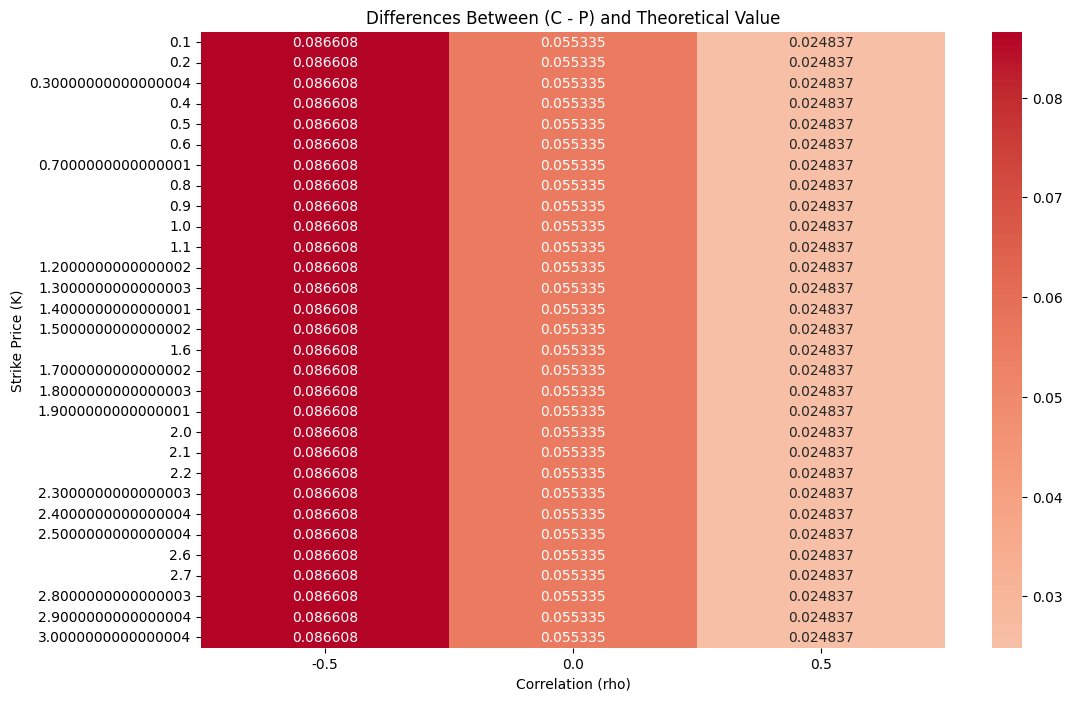

In [36]:
call_options = pd.DataFrame([
    {
        'K': K,
        'rho': rho,
        'T': T,
        'Call_Price': quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call=True)
    }
    for K in K_range
    for rho in rho_range
    for T in T_range
])


put_options = pd.DataFrame([
    {
        'K': K,
        'rho': rho,
        'T': T,
        'Put_Price': quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call=False)
    }
    for K in K_range
    for rho in rho_range
    for T in T_range
])


options = pd.merge(call_options, put_options, on=['K', 'rho', 'T'])


options['C_minus_P'] = options['Call_Price'] - options['Put_Price']


options['Theoretical_C_minus_P'] = (S1 / S2) * np.exp((b1 - b2) * options['T']) - options['K'] * np.exp(-r * options['T'])


options['Difference'] = options['C_minus_P'] - options['Theoretical_C_minus_P']

pivot_prices = options.pivot_table(values=['Call_Price', 'Put_Price'], index='K', columns=['T', 'rho'])

pivot_parity = options.pivot_table(values=['C_minus_P', 'Theoretical_C_minus_P', 'Difference'], index='K', columns=['T', 'rho'])



diff_summary = options['Difference'].describe()



import seaborn as sns

plt.figure(figsize=(12, 8))
heat_data = options.pivot_table(values='Difference', index='K', columns='rho', aggfunc='mean')
sns.heatmap(heat_data, annot=True, fmt=".6f", cmap='coolwarm', center=0)
plt.title('Differences Between (C - P) and Theoretical Value')
plt.xlabel('Correlation (rho)')
plt.ylabel('Strike Price (K)')
plt.show()

* Небольшие выводы 
    - Величины разниц между $C - P$ теоретическим значением из паритета опционов варьируются от ~0.03 до ~0.08, в зависимости от страйкаи корреляции 
    - С увеличением страйковой цены  разницы уменьшаются. Это указывает на то, что модель более точно соблюдает паритет опционов для меньших значений страйка.
    - Для отрицательной корреляции (- 0.5) разница выше
    - Во всех комбинациях разницы остаются относительно стабильными (без резких скачков)

## Задача

Задача (Zhang, 1998, p. 428-437).
Предположим, что есть две акции со спотовыми ценами $S_1 = S_2 = 100$, волатильностью $\sigma_1 = 18\%$ и $\sigma_2 = 15\%$ и ставками дивидендов $q_1 = 4\%$, $q_2 = 3\%$, коэффициент корреляции доходностей  $\rho=0.75$, безрисковая ставка $r = 5\%$ и цена исполнения опциона $K = 1$.

Оцените цены опционов колл и пут по отношению цены первого актива к цене второго, cрок действия которого истекает через год.

Сравните полученные ответ с книгой и сделайте выводы: call=0.0453, put=0.0557.

In [ ]:
# У Чжана другие условия задачи - он подставляет 0.3 и 0.4 в качестве b(=r-q), а не q;
# У Чжана в формуле для d1 вместо (sigma1** - sigma2**2) подставляет sigma_hat**2;
# У Чжана счетная ошибка: пересчитать d1 с его числами - получится другой результат.


def quotient_price_Zhang(tip, S, K, rho, sigma, r, q, T):
    sigma_hat = np.sqrt(sigma[0] ** 2 + sigma[1] ** 2 - 2 * rho * sigma[1] * sigma[0])
    b=[]
    b.append(r-q[0])
    b.append(r-q[1])
    print(b)
    d1 = (np.log(S[0] / S[1] / K) + (b[0] - b[1] - 0.5 * (sigma[0] ** 2 - sigma[1] ** 2)) * T) / \
         (sigma_hat * np.sqrt(T))

    #d1 = (np.log(S[0] / S[1] / K) + (b[0] - b[1] - 0.5 * (sigma_hat**2)) * T) / \
     #    (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)
    F = S[0] / S[1] * np.exp((b[0] - b[1] +  sigma[1] * (sigma[1] - rho * sigma[0])) * T)

    print(sigma_hat, d1, d2)

    if (tip == 'call'):
        return np.exp(-r * T) * (F * norm.cdf(d2) - K * norm.cdf(d1))
    elif (tip == 'put'):
        return -np.exp(-r * T) * (F * norm.cdf(-d2) - K * norm.cdf(-d1))
    else:
        print('Wrong option type')
        return 0

In [ ]:
S=[100.,100.]
K=1
sigma=[0.18,0.15]
q=[0.02,0.01]
rho=0.75
r=0.05
T=1.

print('call=',quotient_price_Zhang('call', S, K, rho, sigma, r, q, T),'; put=',quotient_price_Zhang('put', S, K, rho, sigma, r, q, T))

[0.030000000000000002, 0.04]
0.12000000000000001 -0.12458333333333331 -0.0045833333333333
[0.030000000000000002, 0.04]
0.12000000000000001 -0.12458333333333331 -0.0045833333333333
call= 0.04175792725948984 ; put= 0.049101462345027665


# Мини-проект

Опираясь на книгу ([Hang, 2007](https://drive.google.com/file/d/1yxjRkchVqvl2xkQFyeB2BKNQ1SKJSTtK/view?usp=drive_link)) реализовать расчеты по приведенным формулам и примерам. Привести необходимые определения, оформить формулы с использованием MarkDown. Построить необходимые таблицы и подкрепить полученные результаты иллюстративными графиками. Сделать выводы.

1.   Two-asset correlation options (c. 205).
1.   Exchange-one-asset-for-another options (c. 206).
1.   American exchange-one-asset-for-another options (c. 208).
1.   Exchange options on exchange options (c. 209).
1.   Options on the maximum or the minimun of two risky assets. Call (c. 211).
1.   Options on the maximum or the minimun of two risky assets. Put (c. 211).
1.   Spread-otions approximation (c. 213).
1.   Two-asset barrrier options. Two-asset "out" barriers (c. 215).
1.   Two-asset barrrier options. Two-asset "in" barriers (c. 215).
1.   Partical time two-asset barrrier options. Down-and-in (c. 217).
1.   Partical time two-asset barrrier options. Up-and-in (c. 217).
1.   Two-asset cash-or-nothing options (c. 221)


Two-asset correlation options (c. 205).

In [ ]:

from scipy.stats import multivariate_normal


S1, S2 = 52, 65
X1, X2 = 50, 70
T = 0.5
r = 0.1
b1, b2 = 0.1, 0.1
sigma1, sigma2 = 0.2, 0.3
rho = 0.75

y1 = (np.log(S1 / X1) + (b1 - 0.5 * sigma1**2) * T) / (sigma1 * np.sqrt(T))
y2 = (np.log(S2 / X2) + (b2 - 0.5 * sigma2**2) * T) / (sigma2 * np.sqrt(T))


y1_plus = y1 + rho * sigma2 * np.sqrt(T)
y2_plus = y2 + sigma2 * np.sqrt(T)


M1 = multivariate_normal.cdf([y2_plus, y1_plus], mean=[0, 0], cov=[[1, rho], [rho, 1]])
M2 = multivariate_normal.cdf([y2, y1], mean=[0, 0], cov=[[1, rho], [rho, 1]])

c = S2 * np.exp((b2 - r) * T) * M1 - X2 * np.exp(-r * T) * M2

print("Резульаты")
print(f"y1 = {y1:.4f}\ny2 = {y2:.4f}\nM(y2 + σ2√T, y1 + ρσ2√T; ρ) = {M1:.4f}\nM(y2, y1; ρ) = {M2:.4f}\nЦена колл-опциона: c = {c:.4f}")



Резульаты
y1 = 0.5602
y2 = -0.2197
M(y2 + σ2√T, y1 + ρσ2√T; ρ) = 0.4753
M(y2, y1; ρ) = 0.3933
Цена колл-опциона: c = 4.7073


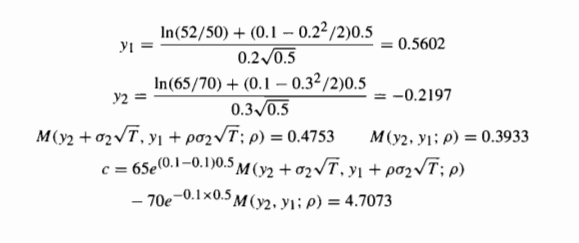


* Необходимые формулы 
* Цена колл-опциона
$$
c = S_2 e^{(b_2 - r)T} M\left(y_2 + \sigma_2 \sqrt{T}, y_1 + \rho \sigma_2 \sqrt{T}; \rho\right) - X_2 e^{-rT} M\left(y_2, y_1; \rho\right),

$$
* Цена пут-опциона
$$
p = X_2 e^{-rT} M\left(-y_2, -y_1; \rho\right) - S_2 e^{(b_2 - r)T} M\left(-y_2 - \sigma_2 \sqrt{T}, -y_1 - \rho \sigma_2 \sqrt{T}; \rho\right),
$$

* Формулы для $y_1$ и $y_2$
$$
y_1 = \frac{\ln\left(\frac{S_1}{X_1}\right) + \left(b_1 - \frac{\sigma_1^2}{2}\right)T}{\sigma_1 \sqrt{T}},
$$

$$
y_2 = \frac{\ln\left(\frac{S_2}{X_2}\right) + \left(b_2 - \frac{\sigma_2^2}{2}\right)T}{\sigma_2 \sqrt{T}}.
$$




---

  Exchange-one-asset-for-another options (c. 206).

In [ ]:
#2 
Q1, Q2 = 1, 1
S1, S2 = 101, 104
T = 0.5
r = 0.1
b1, b2 = 0.02, 0.04
sigma1, sigma2 = 0.18, 0.12
rho = 0.8

sigma_hat = np.sqrt(sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)

d1 = (np.log(Q1 * S1 / (Q2 * S2)) + (b1 - b2 + 0.5 * sigma_hat**2) * T) / (sigma_hat * np.sqrt(T))
d2 = d1 - sigma_hat * np.sqrt(T)


N_d1 = norm.cdf(d1)
N_d2 = norm.cdf(d2)


c_exchange = Q1 * S1 * np.exp((b1 - r) * T) * N_d1 - Q2 * S2 * np.exp((b2 - r) * T) * N_d2

print(f"σ̂ = {sigma_hat:.4f}")
print(f"d1 = {d1:.4f}, d2 = {d2:.4f}")
print(f"N(d1) = {N_d1:.4f}, N(d2) = {N_d2:.4f}")
print(f"Цена опциона на обмен: c_exchange = {c_exchange:.4f}")

σ̂ = 0.1106
d1 = -0.4629, d2 = -0.5411
N(d1) = 0.3217, N(d2) = 0.2942
Цена опциона на обмен: c_exchange = 1.5260


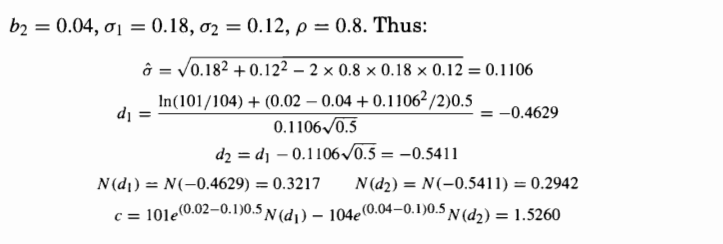

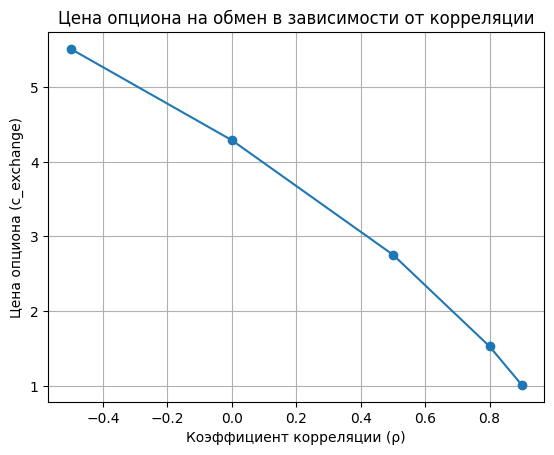

In [60]:


Q1, Q2 = 1, 1
S1, S2 = 101, 104
T = 0.5
r = 0.1
b1, b2 = 0.02, 0.04
sigma1, sigma2 = 0.18, 0.12
rho_values = [-0.5, 0, 0.5, 0.8, 0.9]


rho_values = [-0.5, 0, 0.5, 0.8, 0.9]
prices = []

for rho in rho_values:
   
    sigma_hat = np.sqrt(sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)
    
    d1 = (np.log(Q1 * S1 / (Q2 * S2)) + (b1 - b2 + 0.5 * sigma_hat**2) * T) / (sigma_hat * np.sqrt(T))
    d2 = d1 - sigma_hat * np.sqrt(T)
    
   
    c_exchange = Q1 * S1 * np.exp((b1 - r) * T) * norm.cdf(d1) - Q2 * S2 * np.exp((b2 - r) * T) * norm.cdf(d2)
    prices.append(c_exchange)


plt.plot(rho_values, prices, marker='o')
plt.title('Цена опциона на обмен в зависимости от корреляции')
plt.xlabel('Коэффициент корреляции (ρ)')
plt.ylabel('Цена опциона (c_exchange)')
plt.grid(True)
plt.show()



Цена опциона на обмен

$$
c_{\text{Exchange}} = Q_1 S_1 e^{(b_1 - r)T} N(d_1) - Q_2 S_2 e^{(b_2 - r)T} N(d_2),
$$

где $N(d)$ — кумулятивная функция стандартного нормального распределения.

Формулы для $d_1$ и $d_2$

$$
d_1 = \frac{\ln\left(\frac{Q_1 S_1}{Q_2 S_2}\right) + \left(b_1 - b_2 + \frac{\hat{\sigma}^2}{2}\right)T}{\hat{\sigma} \sqrt{T}},
$$

$$
d_2 = d_1 - \hat{\sigma} \sqrt{T}.
$$
Расчет $\hat{\sigma}$

$$
\hat{\sigma} = \sqrt{\sigma_1^2 + \sigma_2^2 - 2 \rho \sigma_1 \sigma_2},
$$

где:

 $Q_1, Q_2$ — количество активов $S_1$ и $S_2$, соответственно;
 $S_1, S_2$ — текущие цены активов;
 $b_1, b_2$ — ставки выплат по активам;
 $r$ — безрисковая процентная ставка;
 $T$ — время до экспирации опциона;
 $\sigma_1, \sigma_2$ — волатильности активов;
 $\rho$ — коэффициент корреляции между активами.





---

 American exchange-one-asset-for-another options (c. 208).

In [ ]:
#3
S1 = 22
S2 = 20
Q1 = Q2 = 1
r = 0.1
b1 = 0.04
b2 = 0.06
sigma1 = 0.2
T_values = [0.1, 0.5]
sigma2_values = [0.15, 0.20, 0.25]
rho_values = [-0.5, 0, 0.5]

def calculate_american_exchange_option(S1, S2, Q1, Q2, r, b1, b2, sigma1, sigma2, T, rho):
    # Calculate σ̂
    sigma_hat = np.sqrt(sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)

    d1 = (np.log(Q1 * S1 / (Q2 * S2)) + (b1 - b2 + 0.5 * sigma_hat**2) * T) / (sigma_hat * np.sqrt(T))
    d2 = d1 - sigma_hat * np.sqrt(T)
    
    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)
    
    c_exchange = Q1 * S1 * np.exp((b1 - r) * T) * N_d1 - Q2 * S2 * np.exp((b2 - r) * T) * N_d2
    return c_exchange

results = []

for T in T_values:
    for sigma2 in sigma2_values:
        for rho in rho_values:
            price = calculate_american_exchange_option(S1, S2, Q1, Q2, r, b1, b2, sigma1, sigma2, T, rho)
            results.append({
                "T": T,
                "σ2": sigma2,
                "ρ": rho,
                "Option Price": price
            })


df = pd.DataFrame(results)


In [7]:
df

,T,σ2,ρ,Option Price
0,0.1,0.15,-0.5,2.125062
1,0.1,0.15,0.0,2.044561
2,0.1,0.15,0.5,1.973573
3,0.1,0.20,-0.5,2.198631
4,0.1,0.20,0.0,2.091287
5,0.1,0.20,0.5,1.989132
6,0.1,0.25,-0.5,2.282681
7,0.1,0.25,0.0,2.152003
8,0.1,0.25,0.5,2.018860
9,0.5,0.15,-0.5,2.761917


---

 Exchange options on exchange options (c. 209).

In [8]:
from scipy.stats import norm, multivariate_normal


S2 = 100  
T1 = 0.75
T2 = 1.0
r = 0.1
b1 = 0.1
b2 = 0.1
Q = 0.1
sigma1_values = [0.2, 0.2, 0.25, 0.25]
sigma2_values = [0.2, 0.25, 0.2, 0.25]
rho_values = [-0.5, 0, 0.5]
S1_values = [100, 105]


def calculate_d_and_y(S1, S2, b1, b2, r, T1, T2, sigma1, sigma2, rho):
    sigma = np.sqrt(sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)
    d1 = (np.log(S1 / S2) + (b1 - b2 + 0.5 * sigma**2) * T1) / (sigma * np.sqrt(T1))
    d2 = d1 - sigma * np.sqrt(T1)
    d3 = (np.log(S2 / S1) + (b2 - b1 + 0.5 * sigma**2) * T1) / (sigma * np.sqrt(T1))
    d4 = d3 - sigma * np.sqrt(T1)
    y1 = (np.log(S1 / S2) + (b1 - b2 + 0.5 * sigma**2) * T2) / (sigma * np.sqrt(T2))
    y2 = y1 - sigma * np.sqrt(T2)
    y3 = (np.log(S2 / S1) + (b2 - b1 + 0.5 * sigma**2) * T2) / (sigma * np.sqrt(T2))
    y4 = y3 - sigma * np.sqrt(T2)
    return d1, d2, d3, d4, y1, y2, y3, y4, sigma

def calculate_option_values(S1, S2, b1, b2, r, T1, T2, sigma1, sigma2, rho, Q):
    d1, d2, d3, d4, y1, y2, y3, y4, sigma = calculate_d_and_y(S1, S2, b1, b2, r, T1, T2, sigma1, sigma2, rho)
  
    M1 = multivariate_normal.cdf([d1, y1], mean=[0, 0], cov=[[1, np.sqrt(T1 / T2)], [np.sqrt(T1 / T2), 1]])
    M2 = multivariate_normal.cdf([d2, y2], mean=[0, 0], cov=[[1, np.sqrt(T1 / T2)], [np.sqrt(T1 / T2), 1]])
    M3 = multivariate_normal.cdf([d3, y3], mean=[0, 0], cov=[[1, np.sqrt(T1 / T2)], [np.sqrt(T1 / T2), 1]])
    M4 = multivariate_normal.cdf([d4, y4], mean=[0, 0], cov=[[1, np.sqrt(T1 / T2)], [np.sqrt(T1 / T2), 1]])
    # First option price
    c1 = (S1 * np.exp((b1 - r) * T2) * M1 -
          S2 * np.exp((b2 - r) * T2) * M2 -
          Q * S2 * np.exp((b2 - r) * T1) * norm.cdf(d2))
    # Second option price
    c2 = (S2 * np.exp((b2 - r) * T2) * M3 -
          S1 * np.exp((b1 - r) * T2) * M4 +
          Q * S2 * np.exp((b2 - r) * T1) * norm.cdf(d3))
    return c1, c2


results = []

for sigma1, sigma2 in zip(sigma1_values, sigma2_values):
    for S1 in S1_values:
        for rho in rho_values:
            c1, c2 = calculate_option_values(S1, S2, b1, b2, r, T1, T2, sigma1, sigma2, rho, Q)
            results.append({
                "σ1": sigma1,
                "σ2": sigma2,
                "S1": S1,
                "ρ": rho,
                "Option to exchange QS2 for S2": c1,
                "Option to exchange S2 for QS2": c2
            })


df_table_5_5 = pd.DataFrame(results)


In [9]:
df_table_5_5

,σ1,σ2,S1,ρ,Option to exchange QS2 for S2,Option to exchange S2 for QS2
0,0.20,0.20,100,-0.5,8.433435,18.433435
1,0.20,0.20,100,0.0,5.984367,15.984367
2,0.20,0.20,100,0.5,2.778474,12.778474
3,0.20,0.20,105,-0.5,10.798579,15.715173
4,0.20,0.20,105,0.0,8.178528,13.095243
5,0.20,0.20,105,0.5,4.646427,9.564240
6,0.20,0.25,100,-0.5,10.125758,20.125758
7,0.20,0.25,100,0.0,7.423257,17.423257
8,0.20,0.25,100,0.5,3.907293,13.907293
9,0.20,0.25,105,-0.5,12.588263,17.504950



Exchange Options on Exchange Options

* Цена опциона на обмен фиксированного количества $Q$ актива $S_2$ за право обмена $S_2$ на $S_1$

$$
c = S_1 e^{(b_1 - r)T_2} M\left(d_1, y_1; \sqrt{\frac{T_1}{T_2}}\right) - S_2 e^{(b_2 - r)T_2} M\left(d_2, y_2; \sqrt{\frac{T_1}{T_2}}\right) - Q S_2 e^{(b_2 - r)T_1} N(d_2),
$$

где $M(x, y; \rho)$ — функция распределения двумерной нормальной случайной величины с корреляцией $\rho$, а $N(x)$ — стандартная нормальная функция распределения.

* Формулы для $d_1$, $d_2$, $y_1$, $y_2$

$$
d_1 = \frac{\ln\left(\frac{S_1}{S_2}\right) + \left(b_1 - b_2 + \frac{\sigma^2}{2}\right)T_1}{\sigma \sqrt{T_1}}, \quad
d_2 = d_1 - \sigma \sqrt{T_1},
$$

$$
y_1 = \frac{\ln\left(\frac{S_1}{S_2}\right) + \left(b_1 - b_2 + \frac{\sigma^2}{2}\right)T_2}{\sigma \sqrt{T_2}}, \quad
y_2 = y_1 - \sigma \sqrt{T_2}.
$$
* Цена опциона на обмен права обмена $S_2$ на $S_1$ за фиксированное количество $Q$ актива $S_2$

$$
c = S_2 e^{(b_2 - r)T_2} M\left(d_3, y_3; \sqrt{\frac{T_1}{T_2}}\right) - S_1 e^{(b_1 - r)T_2} M\left(d_4, y_4; \sqrt{\frac{T_1}{T_2}}\right) + Q S_2 e^{(b_2 - r)T_1} N(d_3),
$$

*  Формулы для $d_3$, $d_4$, $y_3$, $y_4$

$$
d_3 = \frac{\ln\left(\frac{S_2}{S_1}\right) + \left(b_2 - b_1 + \frac{\sigma^2}{2}\right)T_1}{\sigma \sqrt{T_1}}, \quad
d_4 = d_3 - \sigma \sqrt{T_1},
$$
$$
y_3 = \frac{\ln\left(\frac{S_2}{S_1}\right) + \left(b_2 - b_1 + \frac{\sigma^2}{2}\right)T_2}{\sigma \sqrt{T_2}}, \quad
$$

* Критическое соотношение цен $I_2$

$$
I_2 = \frac{S_2 e^{(b_2 - r)(T_2 - T_1)}}{S_1 e^{(b_1 - r)(T_2 - T_1)}},
$$

где $z_1$ и $z_2$ определяются как:

$$
z_1 = \frac{\ln(I_2) + (T_2 - T_1)\frac{\sigma^2}{2}}{\sigma \sqrt{T_2 - T_1}}, \quad
z_2 = z_1 - \sigma \sqrt{T_2 - T_1}.
$$

* Решение для $Q$

$$
I_1 N(z_1) - N(z_2) = Q.
$$



---

Options on the maximum or the minimun of two risky assets. Call (c. 211).

In [ ]:
S1 = 100
S2 = 105
X = 98
T = 0.5
r = 0.05
b1 = -0.01
b2 = -0.04
sigma1 = 0.11
sigma2 = 0.16
rho = 0.63


sigma = np.sqrt(sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)
rho1 = (sigma1 - rho * sigma2) / sigma
rho2 = (sigma2 - rho * sigma1) / sigma


d = (np.log(S1 / S2) + (b1 - b2 + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
y1 = (np.log(S1 / X) + (b1 + sigma1**2 / 2) * T) / (sigma1 * np.sqrt(T))
y2 = (np.log(S2 / X) + (b2 + sigma2**2 / 2) * T) / (sigma2 * np.sqrt(T))


def bivariate_cdf(x, y, rho):
    return multivariate_normal.cdf([x, y], mean=[0, 0], cov=[[1, rho], [rho, 1]])


c_min = (S1 * np.exp((b1 - r) * T) * bivariate_cdf(y1, -d, -rho1) +
         S2 * np.exp((b2 - r) * T) * bivariate_cdf(y2, d - sigma * np.sqrt(T), -rho2) -
         X * np.exp(-r * T) * bivariate_cdf(y1 - sigma1 * np.sqrt(T), y2 - sigma2 * np.sqrt(T), rho))


c_max = (S1 * np.exp((b1 - r) * T) * bivariate_cdf(y1, d, rho1) +
         S2 * np.exp((b2 - r) * T) * bivariate_cdf(y2, d + sigma * np.sqrt(T), rho2) -
         X * np.exp(-r * T) * (1 - bivariate_cdf(-y1 + sigma1 * np.sqrt(T), -y2 + sigma2 * np.sqrt(T), rho)))


p_min = X * np.exp(-r * T) - c_min
p_max = X * np.exp(-r * T) - c_max

print(f"c_min: {c_min:.4f}")
print(f"c_max: {c_max:.4f}")
print(f"p_min: {p_min:.4f}")
print(f"p_max: {p_max:.4f}")

c_min: 2.9339
c_max: -11.3159
p_min: 92.6464
p_max: 106.8963




Options on the Maximum or Minimum of Two Risky Assets

* Цена колл-опциона на максимум двух активов

$$
c_{\text{max}}(S_1, S_2, X, T) = S_1 e^{(b_1 - r)T} M(y_1, d; \rho_1) + S_2 e^{(b_2 - r)T} M(y_2, d + \sigma \sqrt{T}; \rho_2) - X e^{-rT} \left[ 1 - M(-y_1 + \sigma_1 \sqrt{T}, -y_2 + \sigma_2 \sqrt{T}; \rho) \right],
$$

где $M(x, y; \rho)$ — кумулятивная функция двумерной нормальной случайной величины с корреляцией $\rho$.

* Цена пут-опциона на максимум двух активов

$$
p_{\text{max}}(S_1, S_2, X, T) = X e^{-rT} - c_{\text{max}}(S_1, S_2, 0, T) + c_{\text{max}}(S_1, S_2, X, T),
$$
где:

$$
c_{\text{max}}(S_1, S_2, 0, T) = S_2 e^{(b_2 - r)T} + S_1 e^{(b_1 - r)T} N(d) - S_2 e^{(b_2 - r)T} N(d - \sigma \sqrt{T}),
$$

и:
$$
d = \frac{\ln\left(\frac{S_1}{S_2}\right) + \left(b_1 - b_2 + \frac{\sigma^2}{2}\right)T}{\sigma \sqrt{T}}.
$$

* Цена колл-опциона на минимум двух активов

$$
c_{\text{min}}(S_1, S_2, X, T) = S_1 e^{(b_1 - r)T} M(y_1, -d; -\rho_1) + S_2 e^{(b_2 - r)T} M(y_2, d - \sigma \sqrt{T}; -\rho_2) - X e^{-rT} M(y_1 - \sigma_1 \sqrt{T}, y_2 - \sigma_2 \sqrt{T}; \rho).
$$

* Цена пут-опциона на минимум двух активов

$$
p_{\text{min}}(S_1, S_2, X, T) = X e^{-rT} - c_{\text{min}}(S_1, S_2, 0, T) + c_{\text{min}}(S_1, S_2, X, T),
$$

где:

$$
c_{\text{min}}(S_1, S_2, 0, T) = S_1 e^{(b_1 - r)T} - S_1 e^{(b_1 - r)T} N(d) + S_2 e^{(b_2 - r)T} N(d - \sigma \sqrt{T}),
$$

и:

$$
d = \frac{\ln\left(\frac{S_1}{S_2}\right) + \left(b_1 - b_2 + \frac{\sigma^2}{2}\right)T}{\sigma \sqrt{T}}.
$$

Формулы для $y_1$, $y_2$

$$
y_1 = \frac{\ln\left(\frac{S_1}{X}\right) + \left(b_1 + \frac{\sigma_1^2}{2}\right)T}{\sigma_1 \sqrt{T}}, \quad
y_2 = \frac{\ln\left(\frac{S_2}{X}\right) + \left(b_2 + \frac{\sigma_2^2}{2}\right)T}{\sigma_2 \sqrt{T}}.
$$

* Дополнительные параметры

$$
\sigma = \sqrt{\sigma_1^2 + \sigma_2^2 - 2 \rho \sigma_1 \sigma_2}, \quad
\rho_1 = \frac{\sigma_1 - \rho \sigma_2}{\sigma}, \quad
\rho_2 = \frac{\sigma_2 - \rho \sigma_1}{\sigma}.
$$

